In [32]:
import sys
sys.path.append('../../')
from config_model_output import ModelOutput

import numpy as np

from plotting import conus_map

In [33]:
# Test of HRRR SFC file
main_dir = './'
sub_dir = ""
valid_time = "20160123"
domain = "d01"

hrrr_test = ModelOutput("hrrr-sfc", "grib2", main_dir, sub_dir,
                                 valid_time, domain)

hrrr_test.find_valid_files()
hrrr_test.read_file()
hrrr_test.check_for_attributes()
hrrr_test.check_for_attributes("coords")
hrrr_test.create_dataframe()
hrrr_test.sfc

User variables have been set:
model_name: hrrr-sfc
data_format: grib2
main_dir: ./
sub_dir: **/
valid_time: 20160123
domain: d01
Base time is 20160123, forecast length of valid time is 0.0 s
Single valid file found: ./20160123/hrrr.t00z.wrfsfcf12.grib2
New attributes 'valid_files' and 'unread_files' set
Grib file read sucessfully: ./20160123/hrrr.t00z.wrfsfcf12.grib2
Checking hrrr-sfc attributes
Missing dims: ny
Missing dims: nx
Setting missing dims ny to 1059
Setting missing dims nx to 1799
Checking hrrr-sfc attributes
Missing coords: latitude
Missing coords: longitude
Setting missing coords latitude to<class 'numpy.ndarray'>
Setting missing coords longitude to<class 'numpy.ndarray'>


,xindex,yindex,12h precipitation,latitude,longitude
0,0,0,0.0,21.138000,-122.720001
1,1,0,0.0,21.144987,-122.693336
2,2,0,0.0,21.151968,-122.666664
3,3,0,0.0,21.158941,-122.639984
4,4,0,0.0,21.165907,-122.613304
...,...,...,...,...,...
1905136,1794,1058,0.0,47.883488,-61.064129
1905137,1795,1058,0.0,47.873226,-61.027538
1905138,1796,1058,0.0,47.862953,-60.990959
1905139,1797,1058,0.0,47.852669,-60.954395


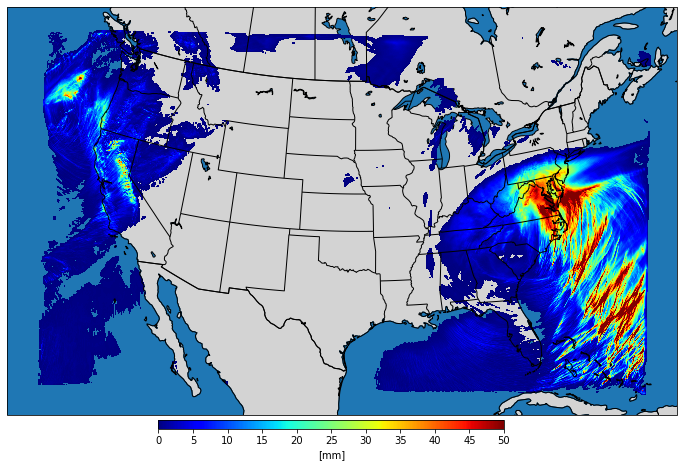

In [35]:
var = hrrr_test.sfc["12h precipitation"].values.reshape(hrrr_test.ny, hrrr_test.nx)
lat = hrrr_test.sfc["latitude"].values.reshape(hrrr_test.ny, hrrr_test.nx)
lon = hrrr_test.sfc["longitude"].values.reshape(hrrr_test.ny, hrrr_test.nx)

var_masked = np.ma.array(var, mask = var < 0.1)
plot_map1 = conus_map(lon, lat, var_masked, units="mm")